In [1]:
%matplotlib inline
import logging
import datetime
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
 

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv3D, MaxPooling3D, BatchNormalization, GaussianNoise
from keras import backend as K
from keras.layers.core import Activation, Dense, Dropout, Flatten
from keras.layers.advanced_activations import ReLU
from keras.regularizers import l2
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.optimizers import SGD
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model


Using TensorFlow backend.


In [2]:
# # memoryの制限
# import tensorflow as tf
# from keras.backend import tensorflow_backend

# config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))
# session = tf.Session(config=config)
# tensorflow_backend.set_session(session)
# run_opts = tf.RunOptions(report_tensor_allocations_upon_oom = True)

In [3]:
#Tuning
dataset = "ModelNet10"  #or "ModelNet40"
cells = 32
batch_size = 128
epochs = 200
learning_rate = 0.01

In [4]:
if dataset == "ModelNet10":
    data_dir = "data10/cell" + str(cells) + "/"
    weights_dir = "weights10/cell" + str(cells) + "/"
    num_classes = 10
    class_name_modelnet = [
    'bathtub',
    'chair',
    'dresser',
    'night_stand',
    'table',
    'bed',
    'desk',
    'monitor',
    'sofa',
    'toilet',
    ]

In [5]:
if dataset == "ModelNet40":
    data_dir = "data40/cell" + str(cells) + "/"
    weights_dir = "weights40/cell" + str(cells) + "/"
    num_classes = 40
    class_name_modelnet = [
    'airplane',
    'bookshelf',
    'chair',
    'desk',
    'glass_box',
    'laptop',
    'person',
    'range_hood',
    'stool',
    'tv_stand',
    'bathtub',
    'bottle',
    'cone',
    'door',
    'guitar',
    'mantel',
    'piano',
    'sink',
    'table',
    'vase',
    'bed',
    'bowl',
    'cup',
    'dresser',
    'keyboard',
    'monitor',
    'plant',
    'sofa',
    'tent',
    'wardrobe',
    'bench',
    'car',
    'curtain',
    'flower_pot',
    'lamp',
    'night_stand',
    'radio',
    'stairs',
    'toilet',
    'xbox',
    ]

In [6]:
train_or_test = ["train","test"]

In [7]:
if os.path.exists(weights_dir) == False:
    os.mkdir(weights_dir)

In [8]:
#set logging level DEBUG and output to stdout
logging.basicConfig(stream=sys.stdout, level=logging.DEBUG)

In [9]:
# optimizer = SGD(lr=0.01, momentum=0.9, decay=0.00016667, nesterov=False)
optimizer = SGD(lr=learning_rate, momentum=0.9, decay=0.00016667, nesterov=False)

# init model
model = Sequential()

# convolution 1
model.add(Conv3D(input_shape=(1, cells, cells, cells),
                            nb_filter=32,
                            kernel_dim1=5,
                            kernel_dim2=5,
                            kernel_dim3=5,
                            init='normal',
                            border_mode='valid',
                            subsample=(2, 2, 2),
                            dim_ordering='th',
                            W_regularizer=l2(0.001),
                            b_regularizer=l2(0.001),
                            ))

# # BatchNormalization 1
# model.add(BatchNormalization(axis=-1, 
#                              momentum=0.99, 
#                              epsilon=0.001, 
#                              center=True, 
#                              scale=True, 
#                              beta_initializer='zeros', 
#                              gamma_initializer='ones', 
#                              moving_mean_initializer='zeros', 
#                              moving_variance_initializer='ones', 
#                              beta_regularizer=None, 
#                              gamma_regularizer=None, 
#                              beta_constraint=None, 
#                              gamma_constraint=None))



#Activation ReLu
model.add(Activation(ReLU()))

# dropout 1
model.add(Dropout(p=0.4))

# convolution 2
model.add(Conv3D(nb_filter=32,
                            kernel_dim1=3,
                            kernel_dim2=3,
                            kernel_dim3=3,
                            init='normal',
                            border_mode='valid',
                            subsample=(1, 1, 1),
                            dim_ordering='th',
                            W_regularizer=l2(0.001),
                            b_regularizer=l2(0.001),
                            ))

# # BatchNormalization 2
# model.add(BatchNormalization(axis=-1, 
#                              momentum=0.99, 
#                              epsilon=0.001, 
#                              center=True, 
#                              scale=True, 
#                              beta_initializer='zeros', 
#                              gamma_initializer='ones', 
#                              moving_mean_initializer='zeros', 
#                              moving_variance_initializer='ones', 
#                              beta_regularizer=None, 
#                              gamma_regularizer=None, 
#                              beta_constraint=None, 
#                              gamma_constraint=None))

#Activation ReLu
model.add(Activation(ReLU()))

# max pool 1
model.add(MaxPooling3D(pool_size=(2, 2, 2),
                           strides=None,
                           border_mode='valid',
                           dim_ordering='th'))

# dropout 2
model.add(Dropout(p=0.4))

# dense 1 (fully connected layer)
model.add(Flatten())

model.add(Dense(output_dim=528, #128
                    init='normal',
                    activation='linear',
                    W_regularizer=l2(0.001),
                    b_regularizer=l2(0.001),
                    ))

# dropout 3
model.add(Dropout(p=0.5))

# dense 2 (fully connected layer)
model.add(Dense(output_dim=num_classes,
                    init='normal',
                    activation='linear',
                    W_regularizer=l2(0.001),
                    b_regularizer=l2(0.001),
                    ))

#Activation Softmax
model.add(Activation("softmax"))

# compile model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])


/home/takitani/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(input_shape=(1, 32, 32..., kernel_size=(5, 5, 5), filters=32, strides=(2, 2, 2), padding="valid", data_format="channels_first", kernel_initializer="normal", kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg...)`
/home/takitani/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/keras/activations.py:186: UserWarning: Do not pass a layer instance (such as ReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
/home/takitani/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.4)`
/home/takitani/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launc

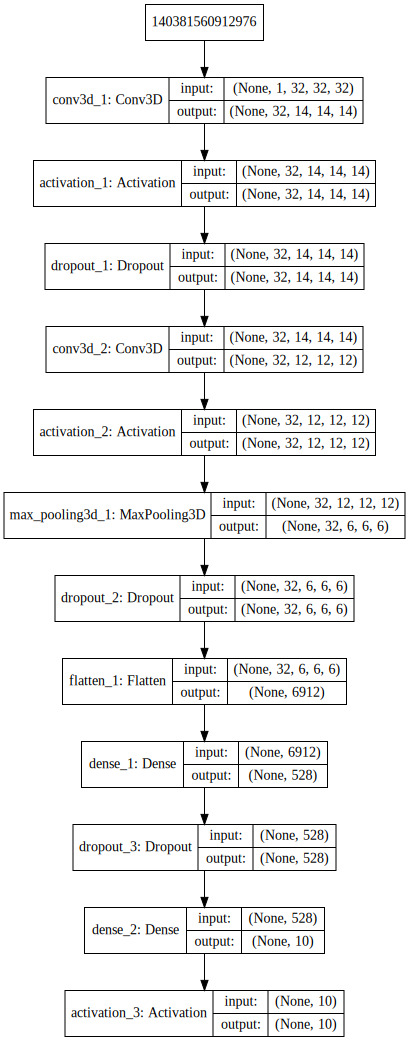

In [10]:
#可視化
SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

In [11]:
#サマリーの表示
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 32, 14, 14, 14)    4032      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 14, 14, 14)    0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 14, 14, 14)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 32, 12, 12, 12)    27680     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 12, 12, 12)    0         
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 32, 6, 6, 6)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 6, 6, 6)       0         
__________

In [12]:
#モデルの図を保存
plot_model(model, to_file='model.png',show_shapes='True')

In [13]:
x_train = np.load( data_dir  + "x_train.npy")
x_test = np.load( data_dir  + "x_test.npy")
y_train = np.load( data_dir + "y_train.npy")
y_test = np.load( data_dir + "y_test.npy")

In [14]:
x_train.shape

(3991, 1, 32, 32, 32)

In [15]:
y_train.shape

(3991, 10)

In [16]:
x_test.shape

(908, 1, 32, 32, 32)

In [17]:
y_test.shape

(908, 10)

In [18]:
es_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto')

In [19]:

result = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(x_test, y_test), 
                   callbacks=[es_cb])

time_now = datetime.datetime.now()
time_now = "_{0}_{1}_{2}_{3}_{4}_{5}".format(time_now.year, time_now.month, time_now.day,
                                             time_now.hour, time_now.minute, time_now.second)
logging.info("save model weights as [weights_{0}.h5]".format(time_now))
model.save_weights(weights_dir+"weights_{0}.h5".format(time_now), False)

Train on 3991 samples, validate on 908 samples
Epoch 1/200
3991/3991 [==============================] - 5s 1ms/step - loss: 10.8713 - acc: 0.5254 - val_loss: 10.0168 - val_acc: 0.7335
Epoch 2/200
3991/3991 [==============================] - 3s 818us/step - loss: 9.7248 - acc: 0.7973 - val_loss: 9.6121 - val_acc: 0.8238
Epoch 3/200
3991/3991 [==============================] - 3s 801us/step - loss: 9.4074 - acc: 0.8569 - val_loss: 9.3692 - val_acc: 0.8447
Epoch 4/200
3991/3991 [==============================] - 3s 813us/step - loss: 9.2129 - acc: 0.8825 - val_loss: 9.2052 - val_acc: 0.8634
Epoch 5/200
3991/3991 [==============================] - 3s 819us/step - loss: 9.0778 - acc: 0.8900 - val_loss: 9.0968 - val_acc: 0.8601
Epoch 6/200
3991/3991 [==============================] - 3s 801us/step - loss: 8.9155 - acc: 0.9128 - val_loss: 8.9671 - val_acc: 0.8590
Epoch 7/200
3991/3991 [==============================] - 3s 824us/step - loss: 8.7739 - acc: 0.9231 - val_loss: 8.8333 - val_acc: 0

3991/3991 [==============================] - 3s 765us/step - loss: 4.8517 - acc: 0.9815 - val_loss: 5.0498 - val_acc: 0.9009
Epoch 61/200
3991/3991 [==============================] - 3s 767us/step - loss: 4.8020 - acc: 0.9825 - val_loss: 5.0230 - val_acc: 0.9009
Epoch 62/200
3991/3991 [==============================] - 3s 766us/step - loss: 4.7569 - acc: 0.9812 - val_loss: 4.9669 - val_acc: 0.9053
Epoch 63/200
3991/3991 [==============================] - 3s 759us/step - loss: 4.7188 - acc: 0.9782 - val_loss: 4.9124 - val_acc: 0.8998
Epoch 64/200
3991/3991 [==============================] - 3s 761us/step - loss: 4.6692 - acc: 0.9802 - val_loss: 4.8892 - val_acc: 0.8877
Epoch 65/200
3991/3991 [==============================] - 3s 764us/step - loss: 4.6288 - acc: 0.9782 - val_loss: 4.8296 - val_acc: 0.9009
Epoch 66/200
3991/3991 [==============================] - 3s 773us/step - loss: 4.5801 - acc: 0.9815 - val_loss: 4.7891 - val_acc: 0.8998
Epoch 67/200
3991/3991 [=======================

3991/3991 [==============================] - 4s 894us/step - loss: 2.9160 - acc: 0.9895 - val_loss: 3.1586 - val_acc: 0.9086
Epoch 120/200
3991/3991 [==============================] - 4s 891us/step - loss: 2.8942 - acc: 0.9892 - val_loss: 3.1417 - val_acc: 0.9031
Epoch 121/200
3991/3991 [==============================] - 4s 891us/step - loss: 2.8732 - acc: 0.9900 - val_loss: 3.1271 - val_acc: 0.8998
Epoch 122/200
3991/3991 [==============================] - 4s 896us/step - loss: 2.8508 - acc: 0.9907 - val_loss: 3.1020 - val_acc: 0.9053
Epoch 123/200
3991/3991 [==============================] - 4s 897us/step - loss: 2.8246 - acc: 0.9907 - val_loss: 3.0740 - val_acc: 0.9097
Epoch 124/200
3991/3991 [==============================] - 4s 900us/step - loss: 2.8064 - acc: 0.9902 - val_loss: 3.0671 - val_acc: 0.9086
Epoch 125/200
3991/3991 [==============================] - 4s 887us/step - loss: 2.7874 - acc: 0.9885 - val_loss: 3.0328 - val_acc: 0.9075
Epoch 126/200
3991/3991 [================

In [20]:
loss,acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

Test loss: 2.66149459011
Test accuracy: 0.903083700703


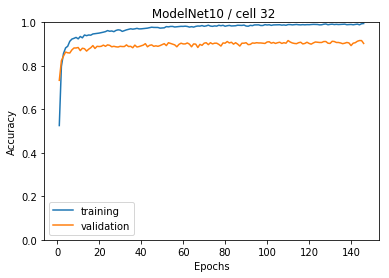

In [34]:

plt.plot(range(1, len(result.history['acc'])+1), result.history['acc'], label="training")
plt.plot(range(1, len(result.history['val_acc'])+1), result.history['val_acc'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend()
plt.title(" {} / cell {}".format(dataset,cells))
plt.show()


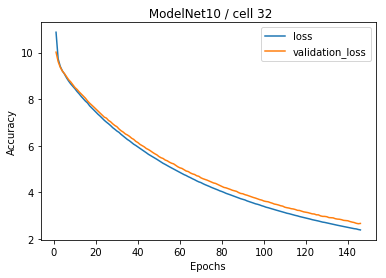

In [40]:
plt.plot(range(1, len(result.history['loss'])+1), result.history['loss'], label="loss")
plt.plot(range(1, len(result.history['val_loss'])+1), result.history['val_loss'], label="validation_loss")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title(" {} / cell {}".format(dataset,cells))
plt.show()

以下，メモ

In [23]:
model.inputs

[<tf.Tensor 'conv3d_1_input:0' shape=(?, 1, 32, 32, 32) dtype=float32>]

In [24]:
json_string = model.to_json()
open('model.json', 'w').write(json_string)

AttributeError: 'ReLU' object has no attribute '__name__'